In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from PIL import Image

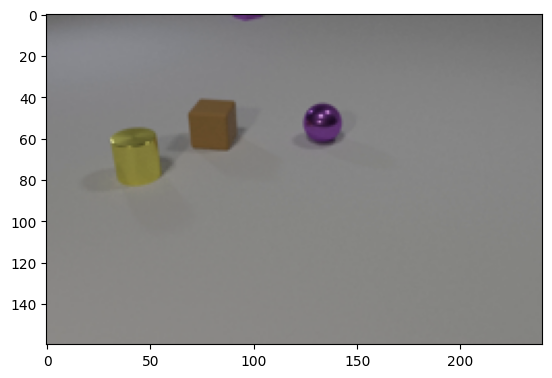

In [7]:
image = cv2.imread("DL_Final_Project/dataset/unlabeled/video_13445/image_1.png", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )

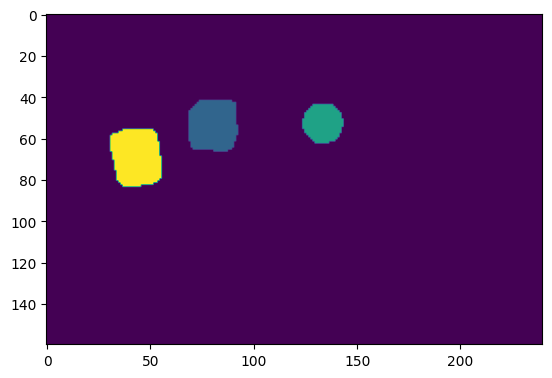

In [8]:
mask = np.load("UnetData_14_epoch/DL_Final_Project/dataset/unlabeled/video_13445/mask.npy")
plt.imshow(mask[0] )

In [ ]:
np.unique(mask[0])

array([ 0, 24, 27, 32, 36])

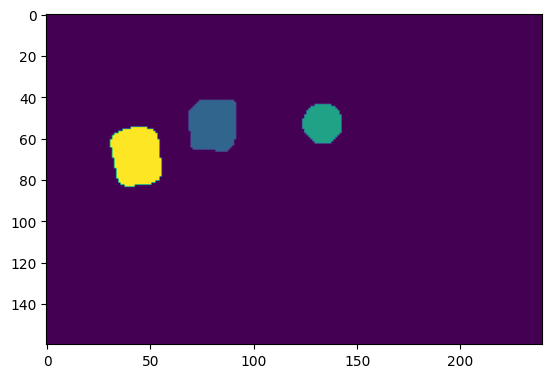

In [9]:
mask = np.load("UnetData_49_epoch/DL_Final_Project/dataset/unlabeled/video_13445/mask.npy")
plt.imshow(mask[0] )

In [ ]:
np.unique(mask[0])

array([ 0, 24, 27, 32, 36])

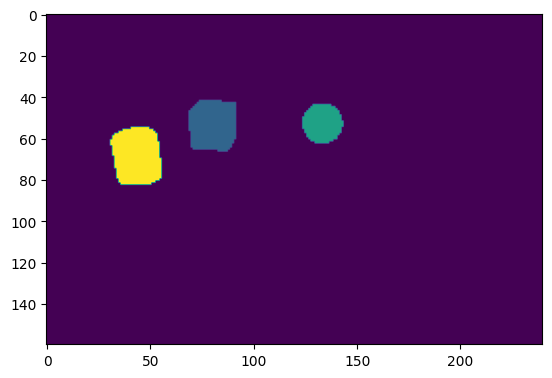

In [11]:
mask = np.load("UnetData_69_epoch/DL_Final_Project/dataset/unlabeled/video_13445/mask.npy")
plt.imshow(mask[0])

In [12]:
np.unique(mask[0])

array([ 0, 13, 23, 40])

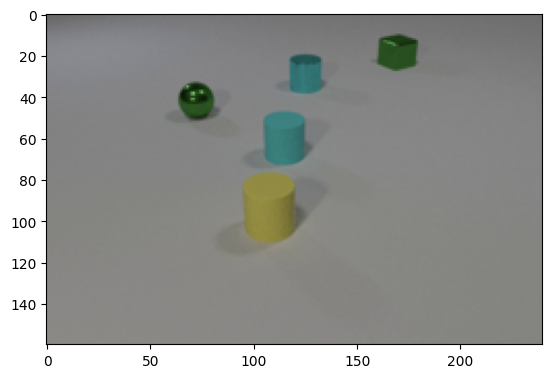

In [19]:
image = cv2.imread("TrainUnet/hidden/video_15000/image_0.png", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )

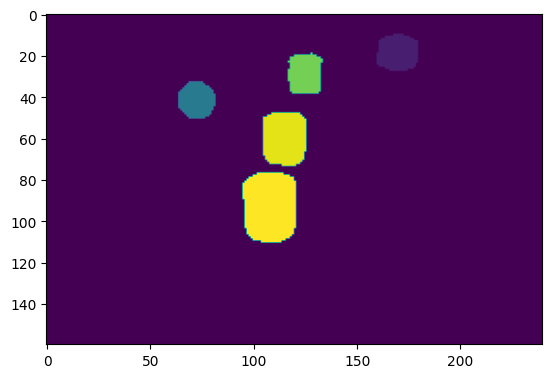

In [20]:
mask = np.load("UnetData_89_epoch_hidden/TrainUnet/hidden/video_15000/mask.npy")
plt.imshow(mask[0])

In [21]:
np.unique(mask[0])

array([ 0,  4, 20, 38, 46, 48])

In [43]:
class CLEVRDataset(Dataset):
    def __init__(self, train_path, test_path, transform=None):
        self.video_paths_test = [os.path.join(test_path, dir_path) for dir_path in os.listdir(test_path) if dir_path.startswith('video')]
        self.video_paths_train = [os.path.join(train_path, dir_path) for dir_path in os.listdir(train_path) if dir_path.startswith('video')]
        self.transform = transform
        self._get_num_samples()

    def __len__(self):
        return self.num_samples

    def _get_num_samples(self):
        self.num_samples = 22 * len(self.video_paths_test)

    def __getitem__(self, idx):

        folder_index = int(idx/22)
        
        img_name_train = os.path.join(self.video_paths_train[idx], 'mask.npy')
        img_name_test = os.path.join(self.video_paths_test[idx], 'mask.npy')
        
        mask_train = np.load(img_name_train)
        mask_test = np.load(img_name_test)

        # Compare element-wise inequality
        inequality_mask = mask_train != mask_test

        return np.mean(inequality_mask)


In [44]:
batch_size = 30
# Dataset and DataLoader
dataset = CLEVRDataset(train_path='DL_Final_Project/dataset/train', test_path = 'UnetData_89_epoch_train/DL_Final_Project/dataset/train/')

# Assuming 'dataset' is already defined
generator = torch.Generator(device='cuda')
sampler = SequentialSampler(dataset)  # Use SequentialSampler to maintain order
dataloader = DataLoader(dataset, batch_size=batch_size, sampler=sampler, shuffle=False)

In [45]:
slices = []
for unmatch in dataloader:
    #if not all(elem == folder[0] for elem in folder):
    #    raise ValueError("All elements in the folder array must be the same value.")
    slices.append(unmatch)

IndexError: list index out of range

In [49]:
np.mean(slices)

0.09680403107782368

In [39]:
dataset[5]

NameError: name 'Image' is not defined